In [111]:
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import time

In [112]:
cols="""duration,
protocol_type,
service,
flag,
src_bytes,
dst_bytes,
land,
wrong_fragment,
urgent,
hot,
num_failed_logins,
logged_in,
num_compromised,
root_shell,
su_attempted,
num_root,
num_file_creations,
num_shells,
num_access_files,
num_outbound_cmds,
is_host_login,
is_guest_login,
count,
srv_count,
serror_rate,
srv_serror_rate,
rerror_rate,
srv_rerror_rate,
same_srv_rate,
diff_srv_rate,
srv_diff_host_rate,
dst_host_count,
dst_host_srv_count,
dst_host_same_srv_rate,
dst_host_diff_srv_rate,
dst_host_same_src_port_rate,
dst_host_srv_diff_host_rate,
dst_host_serror_rate,
dst_host_srv_serror_rate,
dst_host_rerror_rate,
dst_host_srv_rerror_rate"""

columns=[]
for c in cols.split(','):
    if(c.strip()):
       columns.append(c.strip())

columns.append('target')
#print(columns)
print(len(columns))

42


In [119]:
with open("training_attack_types",'r') as f:
    print(f.read())

back:dos
buffer_overflow:u2r
ftp_write:r2l
guess_passwd:r2l
imap:r2l
ipsweep:probe
land:dos
loadmodule:u2r
multihop:r2l
neptune:dos
nmap:probe
perl:u2r
phf:r2l
pod:dos
portsweep:robe
rootkit:u2r
satan:probe
smurf:dos
spy:r2l
teardrop:dos
warezclient:r2l
warezmaster:r2l




In [120]:
attacks_types = {
    'normal': 'normal',
'back': 'dos',
'buffer_overflow': 'u2r',
'ftp_write': 'r2l',
'guess_passwd': 'r2l',
'imap': 'r2l',
'ipsweep': 'probe',
'land': 'dos',
'loadmodule': 'u2r',
'multihop': 'r2l',
'neptune': 'dos',
'nmap': 'probe',
'perl': 'u2r',
'phf': 'r2l',
'pod': 'dos',
'portsweep': 'probe',
'rootkit': 'u2r',
'satan': 'probe',
'smurf': 'dos',
'spy': 'r2l',
'teardrop': 'dos',
'warezclient': 'r2l',
'warezmaster': 'r2l',
}


READING DATASET

In [121]:
path = "kddcup.data_10_percent.gz"
df = pd.read_csv(path,names=columns)

#Adding Attack Type column
df['Attack Type'] = df.target.apply(lambda r:attacks_types[r[:-1]])

df.head()

,duration,protocol_type,service,flag,src_bytes,dst_bytes,land,wrong_fragment,urgent,hot,...,dst_host_same_srv_rate,dst_host_diff_srv_rate,dst_host_same_src_port_rate,dst_host_srv_diff_host_rate,dst_host_serror_rate,dst_host_srv_serror_rate,dst_host_rerror_rate,dst_host_srv_rerror_rate,target,Attack Type
0,0,tcp,http,SF,181,5450,0,0,0,0,...,1.0,0.0,0.11,0.0,0.0,0.0,0.0,0.0,normal.,normal
1,0,tcp,http,SF,239,486,0,0,0,0,...,1.0,0.0,0.05,0.0,0.0,0.0,0.0,0.0,normal.,normal
2,0,tcp,http,SF,235,1337,0,0,0,0,...,1.0,0.0,0.03,0.0,0.0,0.0,0.0,0.0,normal.,normal
3,0,tcp,http,SF,219,1337,0,0,0,0,...,1.0,0.0,0.03,0.0,0.0,0.0,0.0,0.0,normal.,normal
4,0,tcp,http,SF,217,2032,0,0,0,0,...,1.0,0.0,0.02,0.0,0.0,0.0,0.0,0.0,normal.,normal


In [122]:
df.shape

(494021, 43)

In [123]:
df['target'].value_counts()

smurf.              280790
neptune.            107201
normal.              97278
back.                 2203
satan.                1589
ipsweep.              1247
portsweep.            1040
warezclient.          1020
teardrop.              979
pod.                   264
nmap.                  231
guess_passwd.           53
buffer_overflow.        30
land.                   21
warezmaster.            20
imap.                   12
rootkit.                10
loadmodule.              9
ftp_write.               8
multihop.                7
phf.                     4
perl.                    3
spy.                     2
Name: target, dtype: int64

In [124]:
df['Attack Type'].value_counts()

dos       391458
normal     97278
probe       4107
r2l         1126
u2r           52
Name: Attack Type, dtype: int64

DATA PREPROCESSING

In [126]:
df.isnull().sum()

duration                       0
protocol_type                  0
service                        0
flag                           0
src_bytes                      0
dst_bytes                      0
land                           0
wrong_fragment                 0
urgent                         0
hot                            0
num_failed_logins              0
logged_in                      0
num_compromised                0
root_shell                     0
su_attempted                   0
num_root                       0
num_file_creations             0
num_shells                     0
num_access_files               0
num_outbound_cmds              0
is_host_login                  0
is_guest_login                 0
count                          0
srv_count                      0
serror_rate                    0
srv_serror_rate                0
rerror_rate                    0
srv_rerror_rate                0
same_srv_rate                  0
diff_srv_rate                  0
srv_diff_h

In [127]:
#Finding categorical features
num_cols = df._get_numeric_data().columns

cate_cols = list(set(df.columns)-set(num_cols))
cate_cols.remove('target')
cate_cols.remove('Attack Type')

cate_cols

['protocol_type', 'service', 'flag']

CATEGORICAL FEATURES DISTRIBUTION

In [128]:
#Visualization
def bar_graph(feature):
    df[feature].value_counts().plot(kind="bar")

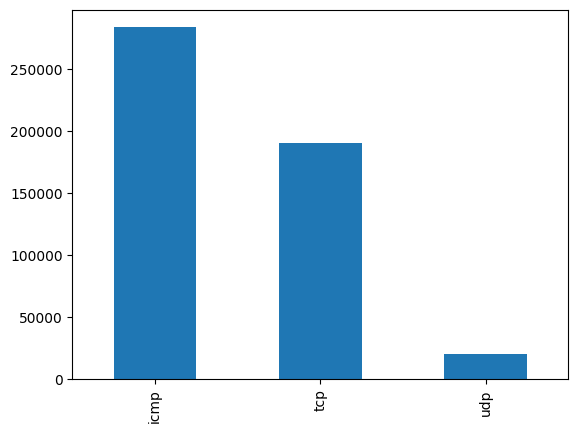

In [129]:
bar_graph('protocol_type')

Protocol type: We notice that ICMP is the most present in the used data, then TCP and almost 20000 packets of UDP type

logged_in (1 if successfully logged in; 0 otherwise): We notice that just 70000 packets are successfully logged in.

TARGET FEATURE DISTRIBUTION

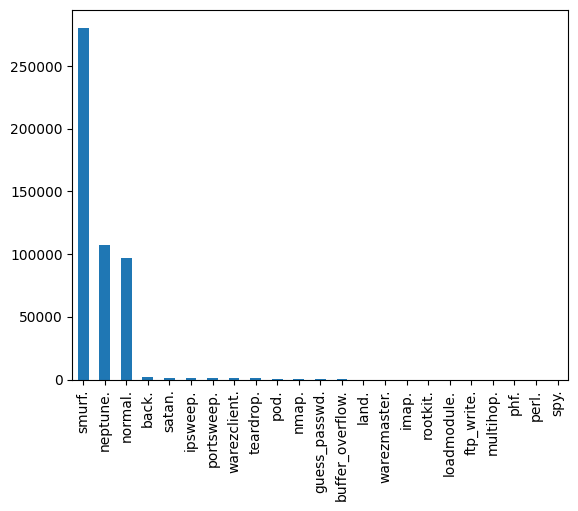

In [131]:
bar_graph('target')

Attack Type(The attack types grouped by attack, it's what we will predict)

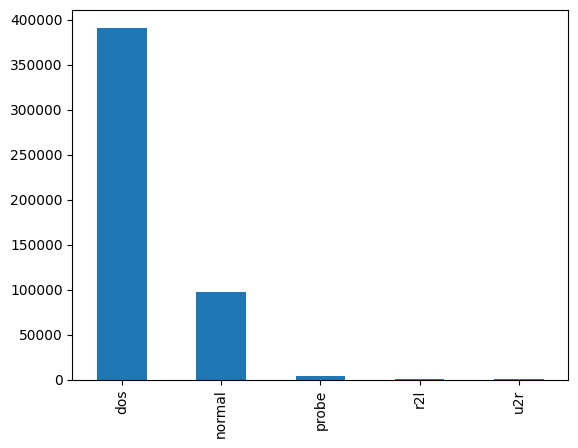

In [132]:
bar_graph('Attack Type')

DATA CORRELATION

<ipython-input-134-31c74935275d>:1: FutureWarning: In a future version of pandas all arguments of DataFrame.dropna will be keyword-only.
  df = df.dropna('columns')# drop columns with NaN
<ipython-input-134-31c74935275d>:5: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corr = df.corr()


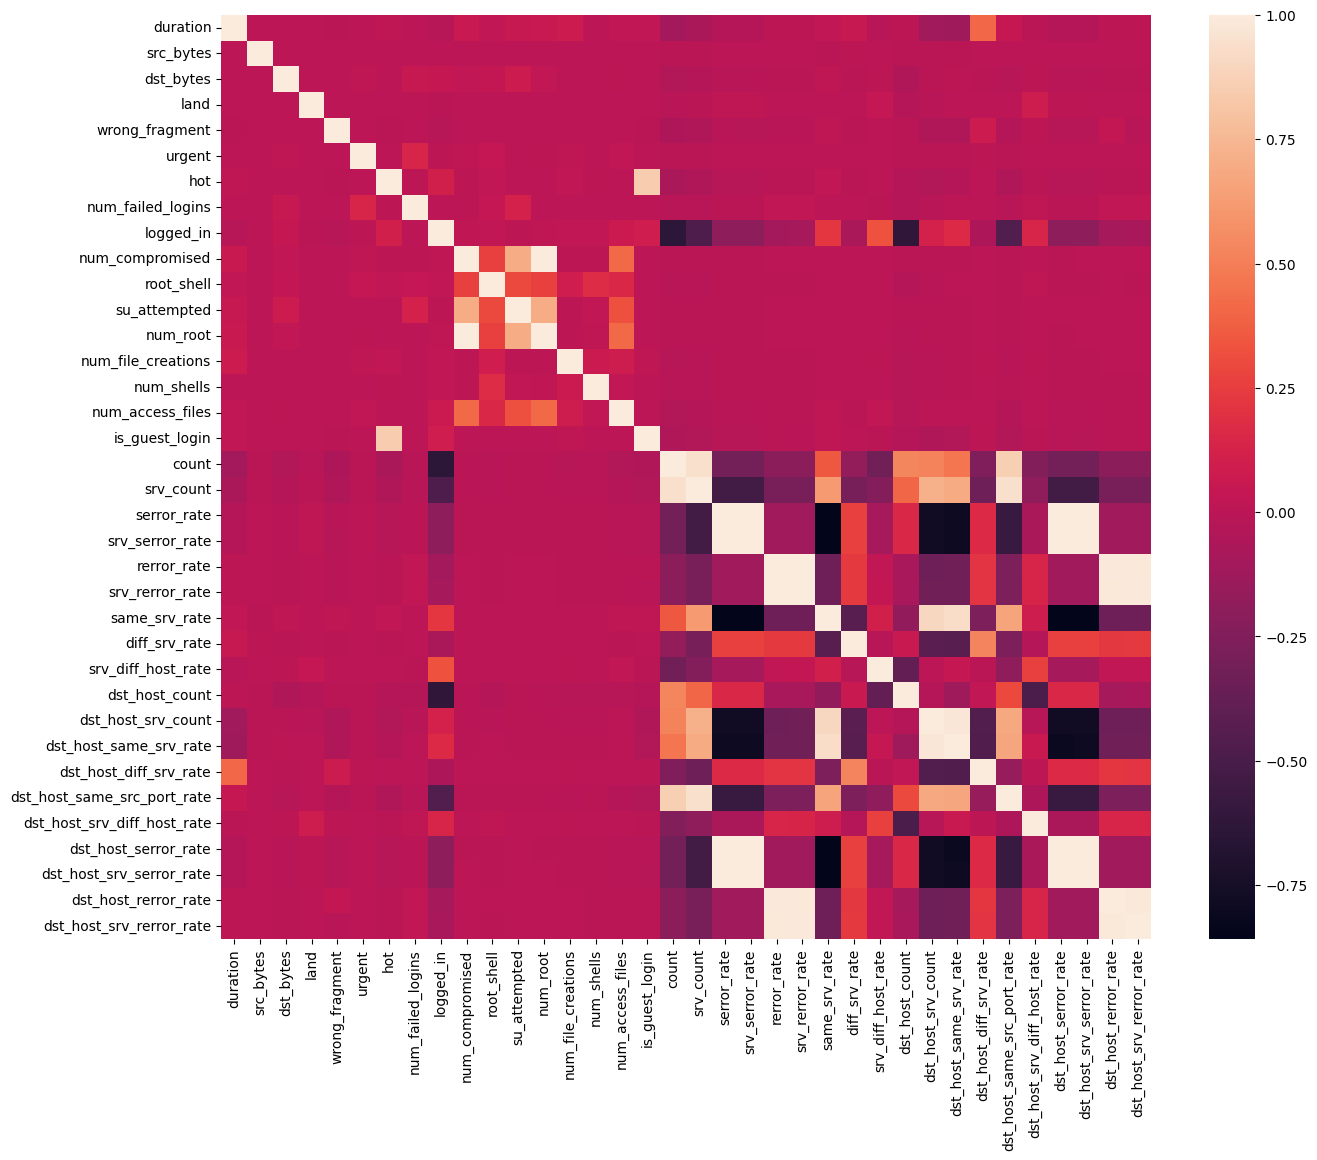

In [134]:
df = df.dropna('columns')# drop columns with NaN

df = df[[col for col in df if df[col].nunique() > 1]]# keep columns where there are more than 1 unique values

corr = df.corr()

plt.figure(figsize=(15,12))

sns.heatmap(corr)

plt.show()

In [135]:
#This variable is highly correlated with num_compromised and should be ignored for analysis.
#(Correlation = 0.9938277978738366)
df.drop('num_root',axis = 1,inplace = True)

#This variable is highly correlated with serror_rate and should be ignored for analysis.
#(Correlation = 0.9983615072725952)
df.drop('srv_serror_rate',axis = 1,inplace = True)

#This variable is highly correlated with rerror_rate and should be ignored for analysis.
#(Correlation = 0.9947309539817937)
df.drop('srv_rerror_rate',axis = 1, inplace=True)

#This variable is highly correlated with srv_serror_rate and should be ignored for analysis.
#(Correlation = 0.9993041091850098)
df.drop('dst_host_srv_serror_rate',axis = 1, inplace=True)

#This variable is highly correlated with rerror_rate and should be ignored for analysis.
#(Correlation = 0.9869947924956001)
df.drop('dst_host_serror_rate',axis = 1, inplace=True)

#This variable is highly correlated with srv_rerror_rate and should be ignored for analysis.
#(Correlation = 0.9821663427308375)
df.drop('dst_host_rerror_rate',axis = 1, inplace=True)

#This variable is highly correlated with rerror_rate and should be ignored for analysis.
#(Correlation = 0.9851995540751249)
df.drop('dst_host_srv_rerror_rate',axis = 1, inplace=True)

#This variable is highly correlated with dst_host_srv_count and should be ignored for analysis.
#(Correlation = 0.9865705438845669)
df.drop('dst_host_same_srv_rate',axis = 1, inplace=True)

In [136]:
df.head()

,duration,protocol_type,service,flag,src_bytes,dst_bytes,land,wrong_fragment,urgent,hot,...,same_srv_rate,diff_srv_rate,srv_diff_host_rate,dst_host_count,dst_host_srv_count,dst_host_diff_srv_rate,dst_host_same_src_port_rate,dst_host_srv_diff_host_rate,target,Attack Type
0,0,tcp,http,SF,181,5450,0,0,0,0,...,1.0,0.0,0.0,9,9,0.0,0.11,0.0,normal.,normal
1,0,tcp,http,SF,239,486,0,0,0,0,...,1.0,0.0,0.0,19,19,0.0,0.05,0.0,normal.,normal
2,0,tcp,http,SF,235,1337,0,0,0,0,...,1.0,0.0,0.0,29,29,0.0,0.03,0.0,normal.,normal
3,0,tcp,http,SF,219,1337,0,0,0,0,...,1.0,0.0,0.0,39,39,0.0,0.03,0.0,normal.,normal
4,0,tcp,http,SF,217,2032,0,0,0,0,...,1.0,0.0,0.0,49,49,0.0,0.02,0.0,normal.,normal


In [139]:
df_std = df.std()
df_std = df_std.sort_values(ascending = True)
df_std

<ipython-input-139-2938f6df5f03>:1: FutureWarning: The default value of numeric_only in DataFrame.std is deprecated. In a future version, it will default to False. In addition, specifying 'numeric_only=None' is deprecated. Select only valid columns or specify the value of numeric_only to silence this warning.
  df_std = df.std()


urgent                              0.005510
land                                0.006673
su_attempted                        0.007793
root_shell                          0.010551
num_shells                          0.011020
num_failed_logins                   0.015520
num_access_files                    0.036482
is_guest_login                      0.037211
dst_host_srv_diff_host_rate         0.042133
diff_srv_rate                       0.082205
num_file_creations                  0.096416
dst_host_diff_srv_rate              0.109259
wrong_fragment                      0.134805
srv_diff_host_rate                  0.142397
rerror_rate                         0.231623
logged_in                           0.355345
serror_rate                         0.380717
same_srv_rate                       0.388189
dst_host_same_src_port_rate         0.481309
hot                                 0.782103
num_compromised                     1.798326
dst_host_count                     64.745380
dst_host_s

FEATURE MAPPING

In [140]:
df['protocol_type'].value_counts()

icmp    283602
tcp     190065
udp      20354
Name: protocol_type, dtype: int64

In [141]:
#protocol_type feature mapping
pmap = {'icmp':0,'tcp':1,'udp':2}
df['protocol_type'] = df['protocol_type'].map(pmap)

In [142]:
df['flag'].value_counts()

SF        378440
S0         87007
REJ        26875
RSTR         903
RSTO         579
SH           107
S1            57
S2            24
RSTOS0        11
S3            10
OTH            8
Name: flag, dtype: int64

In [143]:
#flag feature mapping
fmap = {'SF':0,'S0':1,'REJ':2,'RSTR':3,'RSTO':4,'SH':5 ,'S1':6 ,'S2':7,'RSTOS0':8,'S3':9 ,'OTH':10}
df['flag'] = df['flag'].map(fmap)

In [144]:
df.head()

,duration,protocol_type,service,flag,src_bytes,dst_bytes,land,wrong_fragment,urgent,hot,...,same_srv_rate,diff_srv_rate,srv_diff_host_rate,dst_host_count,dst_host_srv_count,dst_host_diff_srv_rate,dst_host_same_src_port_rate,dst_host_srv_diff_host_rate,target,Attack Type
0,0,1,http,0,181,5450,0,0,0,0,...,1.0,0.0,0.0,9,9,0.0,0.11,0.0,normal.,normal
1,0,1,http,0,239,486,0,0,0,0,...,1.0,0.0,0.0,19,19,0.0,0.05,0.0,normal.,normal
2,0,1,http,0,235,1337,0,0,0,0,...,1.0,0.0,0.0,29,29,0.0,0.03,0.0,normal.,normal
3,0,1,http,0,219,1337,0,0,0,0,...,1.0,0.0,0.0,39,39,0.0,0.03,0.0,normal.,normal
4,0,1,http,0,217,2032,0,0,0,0,...,1.0,0.0,0.0,49,49,0.0,0.02,0.0,normal.,normal


In [145]:
df.drop('service',axis = 1,inplace= True)

MODELLING

In [146]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import accuracy_score

In [147]:
df = df.drop(['target',], axis=1)
print(df.shape)

# Target variable and train set
Y = df[['Attack Type']]
X = df.drop(['Attack Type',], axis=1)

sc = MinMaxScaler()
X = sc.fit_transform(X)

# Split test and train data
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.33, random_state=42)
print(X_train.shape, X_test.shape)
print(Y_train.shape, Y_test.shape)

(494021, 31)
(330994, 30) (163027, 30)
(330994, 1) (163027, 1)


GAUSSIAN NAIVE BAYES

In [148]:
# Gaussian Naive Bayes
from sklearn.naive_bayes import GaussianNB

In [149]:
model1 = GaussianNB()

In [150]:
start_time = time.time()
model1.fit(X_train, Y_train.values.ravel())
end_time = time.time()

In [151]:
print("Training time: ",end_time-start_time)

Training time:  1.1932899951934814


In [152]:
start_time = time.time()
Y_test_pred1 = model1.predict(X_test)
end_time = time.time()

In [153]:
print("Testing time: ",end_time-start_time)

Testing time:  0.24559783935546875


In [154]:
print("Train score is:", model1.score(X_train, Y_train))
print("Test score is:",model1.score(X_test,Y_test))

Train score is: 0.8795114110829804
Test score is: 0.8790384414851528


DECISION TREE

In [155]:
#Decision Tree
from sklearn.tree import DecisionTreeClassifier

In [156]:
model2 = DecisionTreeClassifier(criterion="entropy", max_depth = 4)

In [157]:
start_time = time.time()
model2.fit(X_train, Y_train.values.ravel())
end_time = time.time()

In [158]:
print("Training time: ",end_time-start_time)

Training time:  1.2179579734802246


In [159]:
start_time = time.time()
Y_test_pred2 = model2.predict(X_test)
end_time = time.time()

In [160]:
print("Testing time: ",end_time-start_time)

Testing time:  0.02151322364807129


In [161]:
print("Train score is:", model2.score(X_train, Y_train))
print("Test score is:",model2.score(X_test,Y_test))

Train score is: 0.9905829108684749
Test score is: 0.9905230421954646


RANDOM FOREST

In [162]:
from sklearn.ensemble import RandomForestClassifier

In [163]:
model3 = RandomForestClassifier(n_estimators=30)

In [164]:
start_time = time.time()
model3.fit(X_train, Y_train.values.ravel())
end_time = time.time()

In [165]:
print("Training time: ",end_time-start_time)

Training time:  9.606376647949219


In [166]:
start_time = time.time()
Y_test_pred3 = model3.predict(X_test)
end_time = time.time()

In [167]:
print("Testing time: ",end_time-start_time)

Testing time:  0.44950175285339355


In [168]:
print("Train score is:", model3.score(X_train, Y_train))
print("Test score is:",model3.score(X_test,Y_test))

Train score is: 0.99997583037759
Test score is: 0.999650364663522


SUPPORT VECTOR MACHINE

In [169]:
from sklearn.svm import SVC

In [170]:
model4 = SVC(gamma = 'scale')

In [171]:
start_time = time.time()
model4.fit(X_train, Y_train.values.ravel())
end_time = time.time()

In [172]:
print("Training time: ",end_time-start_time)

Training time:  189.1143581867218


In [173]:
start_time = time.time()
Y_test_pred4 = model4.predict(X_test)
end_time = time.time()

In [174]:
print("Testing time: ",end_time-start_time)

Testing time:  67.55178451538086


In [175]:
print("Train score is:", model4.score(X_train, Y_train))
print("Test score is:", model4.score(X_test,Y_test))

Train score is: 0.9987552644458811
Test score is: 0.9987916112055059


TRAINING ACCURACY

<BarContainer object of 4 artists>

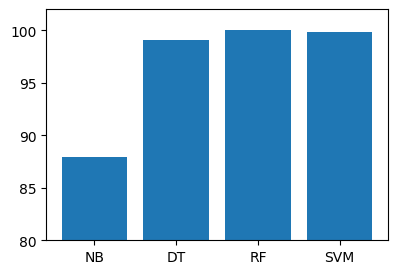

In [176]:
names = ['NB','DT','RF','SVM']
values = [87.951,99.058,99.997,99.875]
f = plt.figure(figsize=(15,3),num=10)
plt.subplot(131)
plt.ylim(80,102)
plt.bar(names,values)

In [177]:
f.savefig('training_accuracy_figure.png',bbox_inches='tight')

TESTING ACCURACY

<BarContainer object of 4 artists>

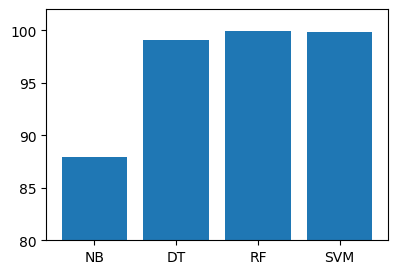

In [178]:
names = ['NB','DT','RF','SVM']
values = [87.903,99.052,99.969,99.879]
f = plt.figure(figsize=(15,3),num=10)
plt.subplot(131)
plt.ylim(80,102)
plt.bar(names,values)

In [179]:
f.savefig('test_accuracy_figure.png',bbox_inches='tight')

TRAINING TIME

<BarContainer object of 4 artists>

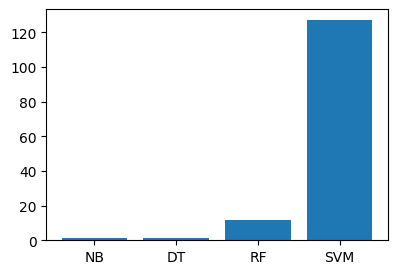

In [180]:
names = ['NB','DT','RF','SVM']
values = [1.04721,1.50483,11.45332,126.96016]
f = plt.figure(figsize=(15,3),num=10)
plt.subplot(131)
plt.bar(names,values)

In [181]:
f.savefig('train_time_figure.png',bbox_inches='tight')

TESTING TIME

<BarContainer object of 4 artists>

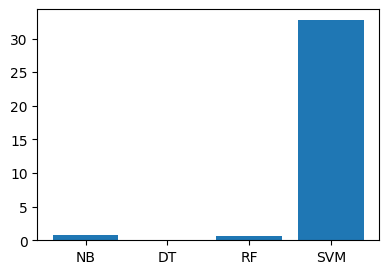

In [182]:
names = ['NB','DT','RF','SVM']
values = [0.79089,0.10471,0.60961,32.72654]
f = plt.figure(figsize=(15,3),num=10)
plt.subplot(131)
plt.bar(names,values)

In [183]:
f.savefig('test_time_figure.png',bbox_inches='tight')

In [184]:
# Modifying the code to include the predicted labels and attack types
Y_test_pred1 = model1.predict(X_test)
Y_test_pred2 = model2.predict(X_test)
Y_test_pred3 = model3.predict(X_test)
Y_test_pred4 = model4.predict(X_test)



# Function to map numeric labels to attack types
def map_attack_type(label):
    for attack, attack_label in attacks_types.items():
        if label == attack_label:
            return attack,attack_label
    return "Unknown"

# Mapping numeric labels to attack types for each model
Y_test_pred1_attack_type = [map_attack_type(label) for label in Y_test_pred1]
Y_test_pred2_attack_type = [map_attack_type(label) for label in Y_test_pred2]
Y_test_pred3_attack_type = [map_attack_type(label) for label in Y_test_pred3]
Y_test_pred4_attack_type = [map_attack_type(label) for label in Y_test_pred4]


# Displaying the predicted attack types
print("Predicted Attack Types:")
print("NB:", Y_test_pred1_attack_type[:10])
print("DT:", Y_test_pred2_attack_type[:10])
print("RF:", Y_test_pred3_attack_type[:10])
print("SVM:", Y_test_pred3_attack_type[:10])

Predicted Attack Types:
NB: [('back', 'dos'), ('back', 'dos'), ('back', 'dos'), ('normal', 'normal'), ('back', 'dos'), ('back', 'dos'), ('back', 'dos'), ('normal', 'normal'), ('back', 'dos'), ('back', 'dos')]
DT: [('back', 'dos'), ('back', 'dos'), ('back', 'dos'), ('normal', 'normal'), ('back', 'dos'), ('back', 'dos'), ('back', 'dos'), ('normal', 'normal'), ('back', 'dos'), ('back', 'dos')]
RF: [('back', 'dos'), ('back', 'dos'), ('back', 'dos'), ('normal', 'normal'), ('back', 'dos'), ('back', 'dos'), ('back', 'dos'), ('normal', 'normal'), ('back', 'dos'), ('back', 'dos')]
SVM: [('back', 'dos'), ('back', 'dos'), ('back', 'dos'), ('normal', 'normal'), ('back', 'dos'), ('back', 'dos'), ('back', 'dos'), ('normal', 'normal'), ('back', 'dos'), ('back', 'dos')]


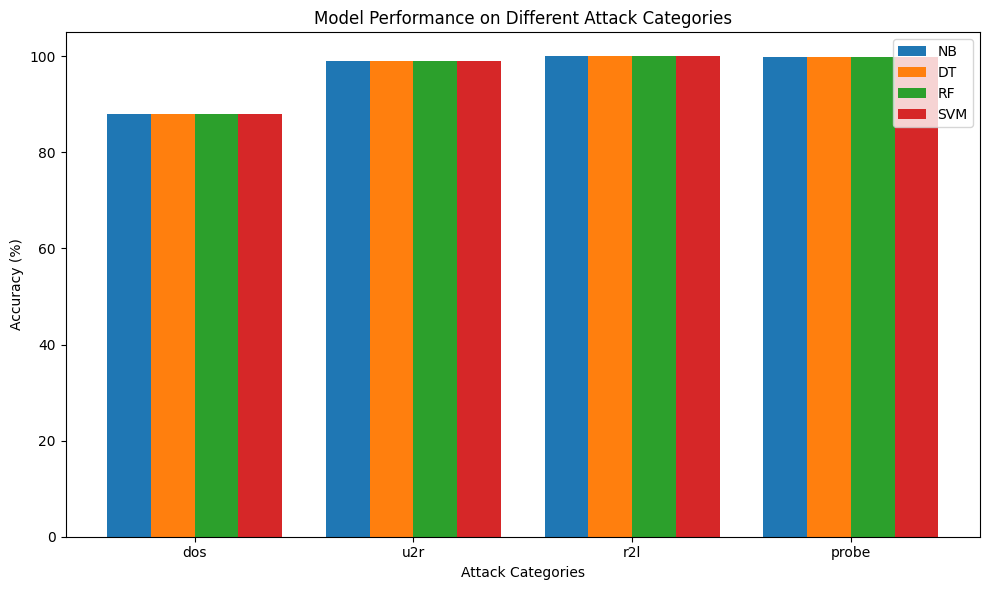

In [198]:
import matplotlib.pyplot as plt
import numpy as np

# Attack categories
attack_categories = ['dos', 'u2r', 'r2l', 'probe']

# Model names
model_names = ['NB', 'DT', 'RF', 'SVM']

# Accuracy scores for each model and attack category
accuracy_scores = [
    [87.951, 99.058, 99.997, 99.875],  # NB
    [87.903, 99.052, 99.969, 99.879],  # DT
    [87.903, 99.052, 99.969, 99.879],  # RF
    [87.903, 99.052, 99.969, 99.879],  # SVM
]

# Plotting the bar chart
bar_width = 0.2
index = np.arange(len(attack_categories))

fig, ax = plt.subplots(figsize=(10, 6))

for i, model_name in enumerate(model_names):
    ax.bar(index + i * bar_width, accuracy_scores[i], bar_width, label=model_name)

ax.set_xlabel('Attack Categories')
ax.set_ylabel('Accuracy (%)')
ax.set_title('Model Performance on Different Attack Categories')
ax.set_xticks(index + 1.5 * bar_width)
ax.set_xticklabels(attack_categories)
ax.legend()

plt.tight_layout()
plt.show()
fig.savefig('model_performance.png',bbox_inches='tight')


In [207]:
# Combine predicted attack types from the first three models into a list of lists
selected_predictions = [Y_test_pred1_attack_type, Y_test_pred2_attack_type, Y_test_pred3_attack_type,Y_test_pred4_attack_type]

# Transpose the list of lists to get a list of rows
rows_predictions = list(map(list, zip(*selected_predictions)))

# Initialize a counter for the number of rows with the same attack type
same_attack_type_count = 0

# Check if each row has the same predicted attack type
for row in rows_predictions:
    if len(set(row)) == 1:
        same_attack_type_count += 1

# Display the number of rows with the same predicted attack type
print("Number of Rows with the Same Predicted Attack Type (NB, DT, RF, SVM):", same_attack_type_count)


Number of Rows with the Same Predicted Attack Type (NB, DT, RF, SVM): 142676
